In [132]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [133]:
# Changing the index to Order Date column.
df = pd.read_excel("5 Years Data.xlsx", index_col="Date")
df.head()

,Location,Catalogue_No,Material,Pack size,Quantity_Sold
Date,,,,,
2013-04-04,Kolkatta,1.93322.5021,(EDTA) Ethylenediaminetetraacetic acid calcium...,5 kg,19
2013-04-04,Mumbai,1.93322.5021,(EDTA) Ethylenediaminetetraacetic acid calcium...,5 kg,100
2013-04-15,Kolkatta,1.93322.5021,(EDTA) Ethylenediaminetetraacetic acid calcium...,5 kg,79
2013-04-16,Delhi,1.93322.5021,(EDTA) Ethylenediaminetetraacetic acid calcium...,5 kg,69
2013-04-16,Chennai,1.93322.5021,(EDTA) Ethylenediaminetetraacetic acid calcium...,5 kg,18


In [134]:
c_no = input("Enter Catalogue number : ")
my_data = df.loc[df.Catalogue_No == c_no,['Quantity_Sold']]
my_data.head()
#1.93217.5021
#6.23300.501730
#1.02161.0500
#1.94502.2521
#1.06009.2500
#1.06404.5000
#1.08816.0250
#1.93400.0521
#6.18752.05001730
#1.93203.0121
#1.93225.0521
#1.01974.2521
#1.94951.5021
#1.93673.0521
#1.93500.2521
#1.94504.0521
#1.93100.5021
#6.18506.00251730
#1.93406.2521
#1.93610.5021
#1.94937.0521
#1.02753.0250
#1.93407.5021
#1.01063.0500
#1.93238.5021
#1.93409.5021
#6.18281.05001730
#1.93001.0521
#1.03943.0250
#1.93000.0521
#1.93609.0521
#1.93663.0521

Enter Catalogue number : 1.93663.0521


,Quantity_Sold
Date,
2013-04-04,15
2013-04-07,40
2013-04-07,60
2013-04-08,25
2013-04-14,20


In [135]:
# Resampling  :   Monthly sum of the Quantity of a particular chemical
series = my_data.Quantity_Sold.resample("M").sum()
series.head()

Date
2013-04-30    475
2013-05-31    520
2013-06-30    570
2013-07-31    610
2013-08-31    680
Freq: M, Name: Quantity_Sold, dtype: int64

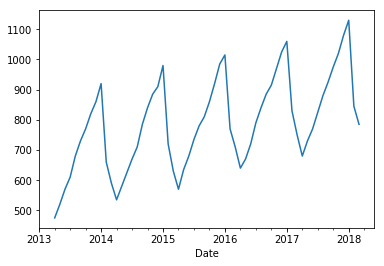

In [136]:
series.plot()
plt.show()

In [137]:
len(series)

60

In [138]:
series.index

DatetimeIndex(['2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31',
               '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30',
               '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31',
               '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31',
               '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30',
               '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31',
               '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31',
               '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30',
               '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
      

In [139]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.75)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=False,transparams=True,trend='c',)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = math.sqrt(mean_squared_error(test, predictions))
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [140]:
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=177.305
ARIMA(0, 0, 1) RMSE=120.758
ARIMA(0, 1, 0) RMSE=110.084
ARIMA(0, 1, 1) RMSE=107.114
ARIMA(0, 1, 2) RMSE=106.879
ARIMA(0, 2, 0) RMSE=135.746
ARIMA(0, 2, 1) RMSE=112.106
ARIMA(0, 2, 2) RMSE=109.047
ARIMA(1, 0, 0) RMSE=103.724
ARIMA(1, 0, 1) RMSE=99.568
ARIMA(1, 0, 2) RMSE=96.232
ARIMA(1, 1, 0) RMSE=107.361
ARIMA(1, 2, 0) RMSE=123.366
ARIMA(1, 2, 1) RMSE=109.412
ARIMA(2, 0, 0) RMSE=98.945
ARIMA(2, 0, 1) RMSE=99.126
ARIMA(2, 1, 0) RMSE=107.989
ARIMA(2, 2, 0) RMSE=123.685
ARIMA(2, 2, 1) RMSE=110.125
ARIMA(3, 0, 0) RMSE=96.831
ARIMA(3, 0, 1) RMSE=97.060
ARIMA(3, 1, 0) RMSE=103.850
ARIMA(3, 2, 0) RMSE=120.896
ARIMA(3, 2, 1) RMSE=106.151
ARIMA(4, 0, 0) RMSE=97.684
ARIMA(4, 1, 0) RMSE=103.401
ARIMA(4, 2, 0) RMSE=119.219
ARIMA(4, 2, 1) RMSE=105.768
Best ARIMA(1, 0, 2) RMSE=96.232


In [22]:
train_size = int(len(series) * 0.75)
train, test = series[0:train_size], series[train_size:]
train.tail()

Date
2016-08-31    1030
2016-09-30    1105
2016-10-31    1180
2016-11-30    1235
2016-12-31     915
Freq: M, Name: Quantity_Sold, dtype: int64

In [24]:
test

Date
2017-01-31     715
2017-02-28     710
2017-03-31     680
2017-04-30     770
2017-05-31     875
2017-06-30     970
2017-07-31     990
2017-08-31    1065
2017-09-30    1140
2017-10-31    1230
2017-11-30    1265
2017-12-31     985
2018-01-31     835
2018-02-28     750
2018-03-31     690
Freq: M, Name: Quantity_Sold, dtype: int64

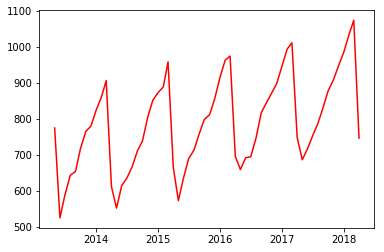

In [141]:
model = ARIMA(series, order=(1, 0, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()

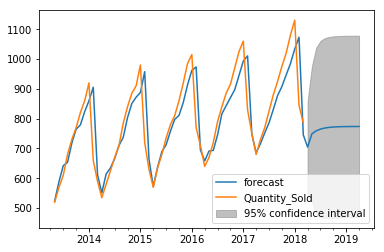

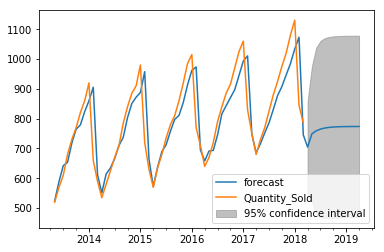

In [142]:
results_ARIMA.plot_predict(1,72) # we want for next 1year so 209+52=261.

In [143]:
x=results_ARIMA.forecast(steps=12)

In [144]:
x[0]

array([704.67208732, 749.00554004, 759.04737996, 765.03804702,
       768.61190322, 770.74396096, 772.01588405, 772.77467605,
       773.22734909, 773.49740055, 773.65850532, 773.7546157 ])